# **Backtesting Mean-Reversion Strategies: Cointegration Screening and ETF Pair Performance**
This project delves into pair trading as a market-neutral strategy, focusing on ETFs to explore quantitative finance concepts. By identifying cointegrated pairs and backtesting a mean-reversion approach, it illustrates practical applications in arbitrage and risk management, drawing from real-world market dynamics.

##**Introduction**
Pair trading leverages statistical relationships between assets to exploit temporary mispricings. This section outlines the project's methodology, including data sourcing, cointegration testing, and performance evaluation. The strategy aligns with Flow Traders' emphasis on ETP liquidity and efficient markets, using real historical data to simulate trading decisions.

In [1]:
# Install libraries

import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

import datetime
import yfinance as yf

##**Pair Selection and Initital Cointegration Analysis**
In this section, we apply the cointegration function to a curated list of stocks to identify potential pairs for trading. By downloading historical closing prices and screening for low p-values in the cointegration test, we uncover relationships that could form the basis of a mean-reversion strategy. The heatmap visualizes pairwise p-values, highlighting statistically significant cointegrated pairs for further backtesting.

In [2]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [3]:
# Setting data period
start_date = "2022-10-01"
end_date = "2025-10-01"

# Input tickers here
tickers = [
    "SPY", "IVV", "VOO", "QQQ", "DIA",
    "XLF", "VFH", "XLE", "XLV", "XLK", "XLY", "XLI", "XLB", "XLP", "XLU",
    "GLD", "SLV", "UNG", "EWA", "EWC", "EWZ", "IGE", "PSCF", "IYW", "USO", "XLE"
]


df = yf.download(tickers, start=start_date, end=end_date)['Close']
df.tail()

/tmp/ipython-input-2327071692.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  25 of 25 completed


Ticker,DIA,EWA,EWC,EWZ,GLD,IGE,IVV,IYW,PSCF,QQQ,...,VOO,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2025-09-24,460.864471,26.469999,50.240002,31.049999,343.320007,48.869999,664.260010,193.740005,57.680000,596.099976,...,607.761902,88.980003,90.339996,53.610001,152.250000,278.489990,78.519997,86.250000,136.389999,239.600006
2025-09-25,459.275024,26.469999,50.049999,30.580000,344.750000,49.130001,661.219971,193.479996,57.380001,593.530029,...,604.860229,87.820000,91.150002,53.470001,151.220001,278.000000,77.769997,85.419998,134.130005,236.220001
2025-09-26,462.124084,26.670000,50.020000,30.730000,346.739990,49.599998,664.890015,194.050003,57.820000,595.969971,...,608.419983,88.839996,91.989998,53.860001,152.580002,278.839996,77.959999,86.809998,135.500000,239.710007
2025-09-29,462.883820,26.980000,50.459999,30.990000,352.459991,49.150002,666.760010,194.929993,57.459999,598.729980,...,610.130005,89.180000,90.300003,54.130001,153.050003,280.329987,78.110001,87.059998,135.899994,240.759995
2025-09-30,463.583557,27.000000,50.549999,31.000000,355.470001,49.049999,669.299988,195.860001,57.330002,600.369995,...,612.380005,89.620003,89.339996,53.869999,154.229996,281.859985,78.370003,87.209999,139.169998,239.639999


## **Visualizing Cointegration Results**
The following heatmap displays the p-values from the cointegration tests across all pairs, with lower values (greener shades) indicating stronger evidence of cointegration. We mask non-significant results (p >= 0.05) for clarity, focusing on viable candidates. The identified pairs are printed for reference, guiding selection for strategy implementation.

<Axes: >

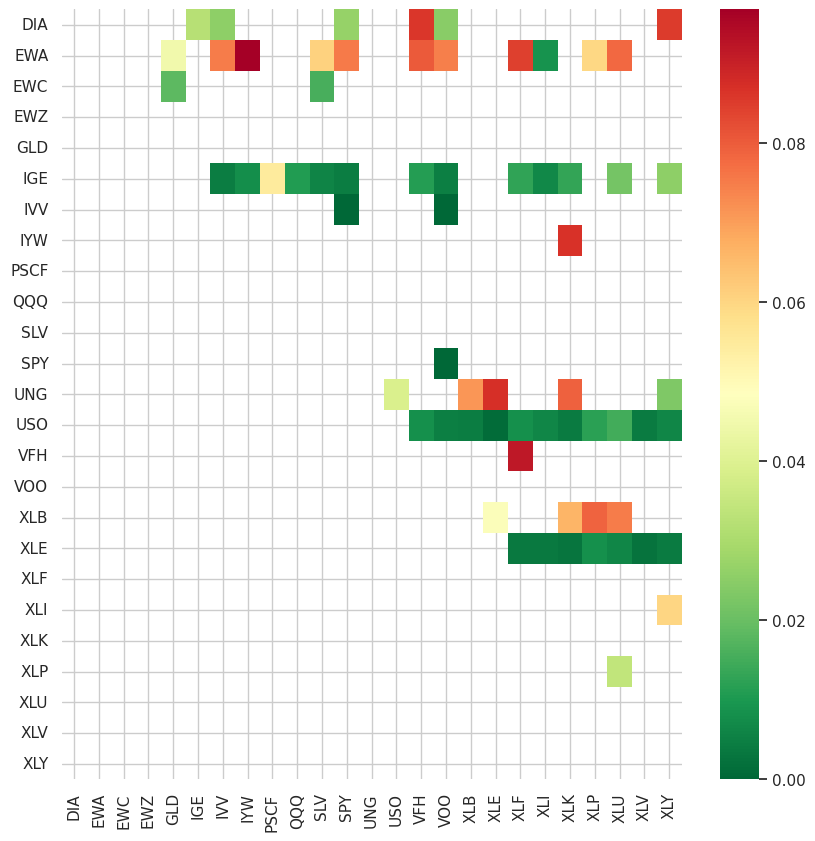

In [4]:
# Heatmap
scores, pvalues, pairs = find_cointegrated_pairs(df)
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=df.columns, yticklabels=df.columns, cmap='RdYlGn_r'
                , mask = (pvalues >= 0.1))


In [5]:
# Print pairs with their p-values
print("Cointegrated pairs (p-value < 0.05):")
keys = df.keys()
for pair in pairs:
    stock1, stock2 = pair
    pvalue = pvalues[keys.get_loc(stock1), keys.get_loc(stock2)]
    print(f"{stock1}, {stock2}: ({pvalue:.4f})")

Cointegrated pairs (p-value < 0.05):
DIA, IGE: (0.0323)
DIA, IVV: (0.0254)
DIA, SPY: (0.0268)
DIA, VOO: (0.0247)
EWA, GLD: (0.0449)
EWA, XLI: (0.0088)
EWC, GLD: (0.0184)
EWC, SLV: (0.0157)
IGE, IVV: (0.0045)
IGE, IYW: (0.0079)
IGE, QQQ: (0.0109)
IGE, SLV: (0.0057)
IGE, SPY: (0.0044)
IGE, VFH: (0.0113)
IGE, VOO: (0.0045)
IGE, XLF: (0.0128)
IGE, XLI: (0.0067)
IGE, XLK: (0.0132)
IGE, XLU: (0.0216)
IGE, XLY: (0.0257)
IVV, SPY: (0.0002)
IVV, VOO: (0.0000)
SPY, VOO: (0.0000)
UNG, USO: (0.0392)
UNG, XLY: (0.0233)
USO, VFH: (0.0080)
USO, VOO: (0.0049)
USO, XLB: (0.0042)
USO, XLE: (0.0010)
USO, XLF: (0.0082)
USO, XLI: (0.0063)
USO, XLK: (0.0040)
USO, XLP: (0.0120)
USO, XLU: (0.0151)
USO, XLV: (0.0040)
USO, XLY: (0.0061)
XLB, XLE: (0.0476)
XLE, XLF: (0.0036)
XLE, XLI: (0.0036)
XLE, XLK: (0.0028)
XLE, XLP: (0.0080)
XLE, XLU: (0.0064)
XLE, XLV: (0.0024)
XLE, XLY: (0.0040)
XLP, XLU: (0.0342)


## **Engle-Granger Cointegration Test**

The following analysis performs the Engle-Granger Cointegration test on the selected pair of assets. This provides the key statistical evidence to determine if a stable, long-term relationship exists, which is the foundation of a successful pairs trading strategy. The results guide our decision on whether this pair is a viable candidate for strategy implementation.



In [6]:
pair_names = ["USO", "XLE"]

df_pair = yf.download(pair_names, start=start_date, end=end_date)['Close']

y = df_pair[pair_names[1]]
x = df_pair[pair_names[0]]


coint_test_result = coint(y, x)

coint_statistic = coint_test_result[0]
coint_pvalue = coint_test_result[1]

x_const = sm.add_constant(x)
model = sm.OLS(y, x_const).fit()
beta = model.params[pair_names[0]]
mean = model.params['const']
residuals = model.resid

residuals_shifted = residuals.shift(1).dropna()
residuals_diff = residuals.diff().dropna()
ar_model = sm.OLS(residuals_diff, residuals_shifted).fit()
rho = ar_model.params.iloc[0] + 1

half_life = -np.log(2) / np.log(rho)


print("\nOLS Regression Results:")
print(f"{pair_names[1]} = {beta:.4f} * {pair_names[0]} + {mean:.4f} + Residuals")

print("\nEngle-Granger Cointegration Test Results:")
print(f"  Test Statistic: {coint_statistic:.3f}")
print(f"  p-value: {coint_pvalue:.5f}")
# print(f"  Critical Values: {coint_critical_values}") # Optional: uncomment to show critical values

print(f"\nEstimated Half-life of Mean Reversion: {half_life:.6f} days")


# --- Conclusion based on Cointegration Test ---
# A common threshold for cointegration is a p-value < 0.05
if coint_pvalue < 0.05:
    print(f"\nConclusion: {pair_names[0]} and {pair_names[1]} are likely cointegrated.")
else:
    print(f"\nConclusion: {pair_names[0]} and {pair_names[1]} are likely NOT cointegrated.")

/tmp/ipython-input-1745160201.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_pair = yf.download(pair_names, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed


OLS Regression Results:
XLE = 0.8208 * USO + 23.5304 + Residuals

Engle-Granger Cointegration Test Results:
  Test Statistic: -4.199
  p-value: 0.00367

Estimated Half-life of Mean Reversion: 13.361075 days

Conclusion: USO and XLE are likely cointegrated.


## **Visualizing the Price Relationship**
The following chart plots the historical closing prices for the selected pair of assets. This visual inspection serves as an initial check to confirm our hypothesis that the pair's prices tend to move together over time. If a strong visual correlation is apparent, we can proceed with a formal statistical test to determine if the relationship is stable and mean-reverting (i.e., cointegrated).

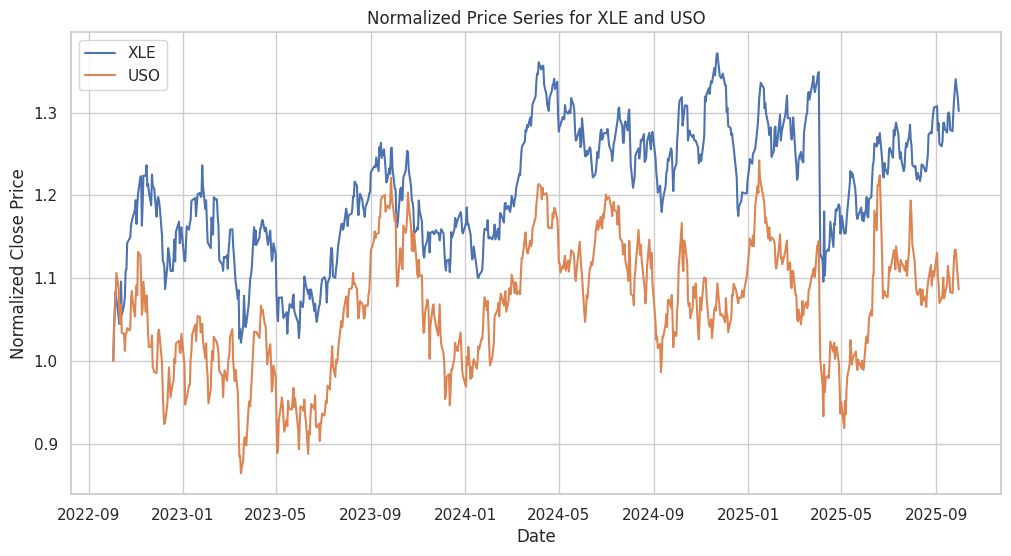

In [7]:
plt.figure(figsize=(12, 6))

# Normalize prices to start at 1 for easier comparison
normalized_y = df_pair[pair_names[1]] / df_pair[pair_names[1]].iloc[0]
normalized_x = df_pair[pair_names[0]] / df_pair[pair_names[0]].iloc[0]

plt.plot(normalized_y.index, normalized_y.values, label=pair_names[1])
plt.plot(normalized_x.index, normalized_x.values, label=pair_names[0])

plt.title(f'Normalized Price Series for {pair_names[1]} and {pair_names[0]}')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.grid(True)
plt.show()

# **Generating Trading Signals with a Threshold Strategy**
This cell defines the function that generates our trading signals. It implements a classic Bollinger Band-style threshold strategy, deciding when to enter or exit a trade based on how far the spread deviates from its historical mean.

The function operates as follows:



1.   **Z-Score Calculation:** Calculates a rolling Z-score for the spread. This metric measures how many standard deviations the current spread value is from its recent average (defined by the lookback period). A large positive or negative Z-score indicates a significant deviation from the norm.
2.   **Signal Generation Logic:** It then applies a threshold-based rule to generate signals (1 for long, -1 for short, 0 for flat):
*   **Entry:** A long position is initiated when the Z-score drops below the negative entry_zscore. A short position is initiated when the Z-score exceeds the positive entry_zscore.
*   **Exit:** The position is held until the spread reverts towards its mean. The trade is closed when the Z-score crosses back over the exit_zscore threshold.


This function returns the final signal series and the calculated Z-score, which are use to backtest the strategy's performance.

In [8]:

def generate_BB_thresholded_signal(
    spread,
    entry_zscore = 1.0,
    exit_zscore = 0.0,
    lookback = 20,
    start_signal_at = None
):

    if start_signal_at is None:
        start_signal_at = lookback

    # Compute Z-score
    rolling_mean = spread.rolling(window=lookback).mean()
    rolling_std = spread.rolling(window=lookback).std()

    z_score = (spread - rolling_mean) / rolling_std


    # 0 = flat, 1 = long spread, -1 = short spread
    T = len(spread)
    signal = pd.Series(0.0, index=spread.index)

    start_index_0 = max(start_signal_at, lookback) - 1 # Convert R 1-index to Python 0-index

    for t in range(start_index_0, T):

        if pd.isna(z_score.iloc[t]):
            signal.iloc[t] = 0.0
            continue

        # Entry signals
        if z_score.iloc[t] < -entry_zscore:
            signal.iloc[t] = 1.0
        elif z_score.iloc[t] > entry_zscore:
            signal.iloc[t] = -1.0

        else:
            if signal.iloc[t-1] == 1.0 and z_score.iloc[t] < -exit_zscore:
                signal.iloc[t] = 1.0
            elif signal.iloc[t-1] == -1.0 and z_score.iloc[t] > exit_zscore:
                signal.iloc[t] = -1.0

    return {'signal': signal, 'z_score': z_score}

# **Calculating Strategy Performance (P&L)**
This cell defines the function responsible for simulating the strategy's performance and calculating its Profit and Loss (P&L). It takes the spread and signal series and computes the resulting equity curve.











In [9]:
def compute_cumPnL_spread_trading(
    spread,
    signal,
    compounded = False
):
    if not spread.index.equals(signal.index):
        raise ValueError("Temporal indices not aligned in spread and signal.")

    signal_delayed = signal.shift(1).fillna(0.0)

    spread_ret = spread.diff().fillna(0.0)

    portf_ret = signal_delayed * spread_ret

    if compounded:
        portf_cumret = (1 + portf_ret).cumprod() - 1
    else:
        portf_cumret = portf_ret.cumsum()

    return portf_cumret

# **Defining the Dynamic Hedge Ratio (Rolling Regression)**
This cell defines the function used to calculate the dynamic hedge ratio (beta) and intercept between the two assets. It implements a rolling linear regression, which repeatedly fits an OLS model on a sliding window of historical data to adapt to changing market conditions.

The lookback parameter determines the size of this window, while the every parameter sets how often the coefficients are recalculated. The output is a time-varying series for the hedge ratio, which is essential for constructing a robust, mean-reverting spread.

In [10]:
def fit_rolling_ls(y1, y2, lookback=2*252, every=50):
    if not isinstance(y1, pd.Series):
        y1 = pd.Series(y1)
    if not isinstance(y2, pd.Series):
        y2 = pd.Series(y2)

    T = len(y1)

    update_points = list(range(lookback, T, every))
    if update_points[-1] < T:
        update_points.append(T)

    beta = np.full(T, np.nan)
    mean = np.full(T, np.nan)

    for t in update_points:

        y1_window = y1[t-lookback : t]
        y2_window = y2[t-lookback : t]

        X = sm.add_constant(y2_window)


        model = sm.OLS(y1_window, X).fit()
        mean[t-1] = model.params.iloc[0]
        beta[t-1] = model.params.iloc[1]

    beta = pd.Series(beta, index=y1.index)
    mean = pd.Series(mean, index=y1.index)

    beta = beta.fillna(method='ffill')
    mean = mean.fillna(method='ffill')

    beta = beta.fillna(method='bfill')
    mean = mean.fillna(method='bfill')

    return {'beta': beta, 'mean': mean}

# **Executing the Backtest and Visualizing Results**
This cell is the core of the backtest simulation. It brings together all previously defined functions to run the pairs trading strategy on the historical data and then generates a comprehensive set of plots to analyze the results.


**Hedge Ratio and Spread Construction:** It uses the fit_rolling_ls function to calculate the dynamic hedge ratio and then constructs the mean-reverting spread series.

**Signal Generation:** The generate_BB_thresholded_signal function is called to apply the trading logic to the spread, creating a time series of buy (+1), sell (-1), and flat (0) signals.

**P&L Calculation:** The strategy's performance is simulated by calculating the daily profit and loss, which is then summed up to produce the cumulative return.

**Visualization:** A dashboard of five plots is generated to provide a complete overview of the strategy's behavior: the spread over time, the Z-score with entry/exit bands, the trading positions, the spread with buy/sell entry markers, and the final cumulative return curve.

/tmp/ipython-input-3474786856.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  beta = beta.fillna(method='ffill')
/tmp/ipython-input-3474786856.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mean = mean.fillna(method='ffill')
/tmp/ipython-input-3474786856.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  beta = beta.fillna(method='bfill')
/tmp/ipython-input-3474786856.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mean = mean.fillna(method='bfill')


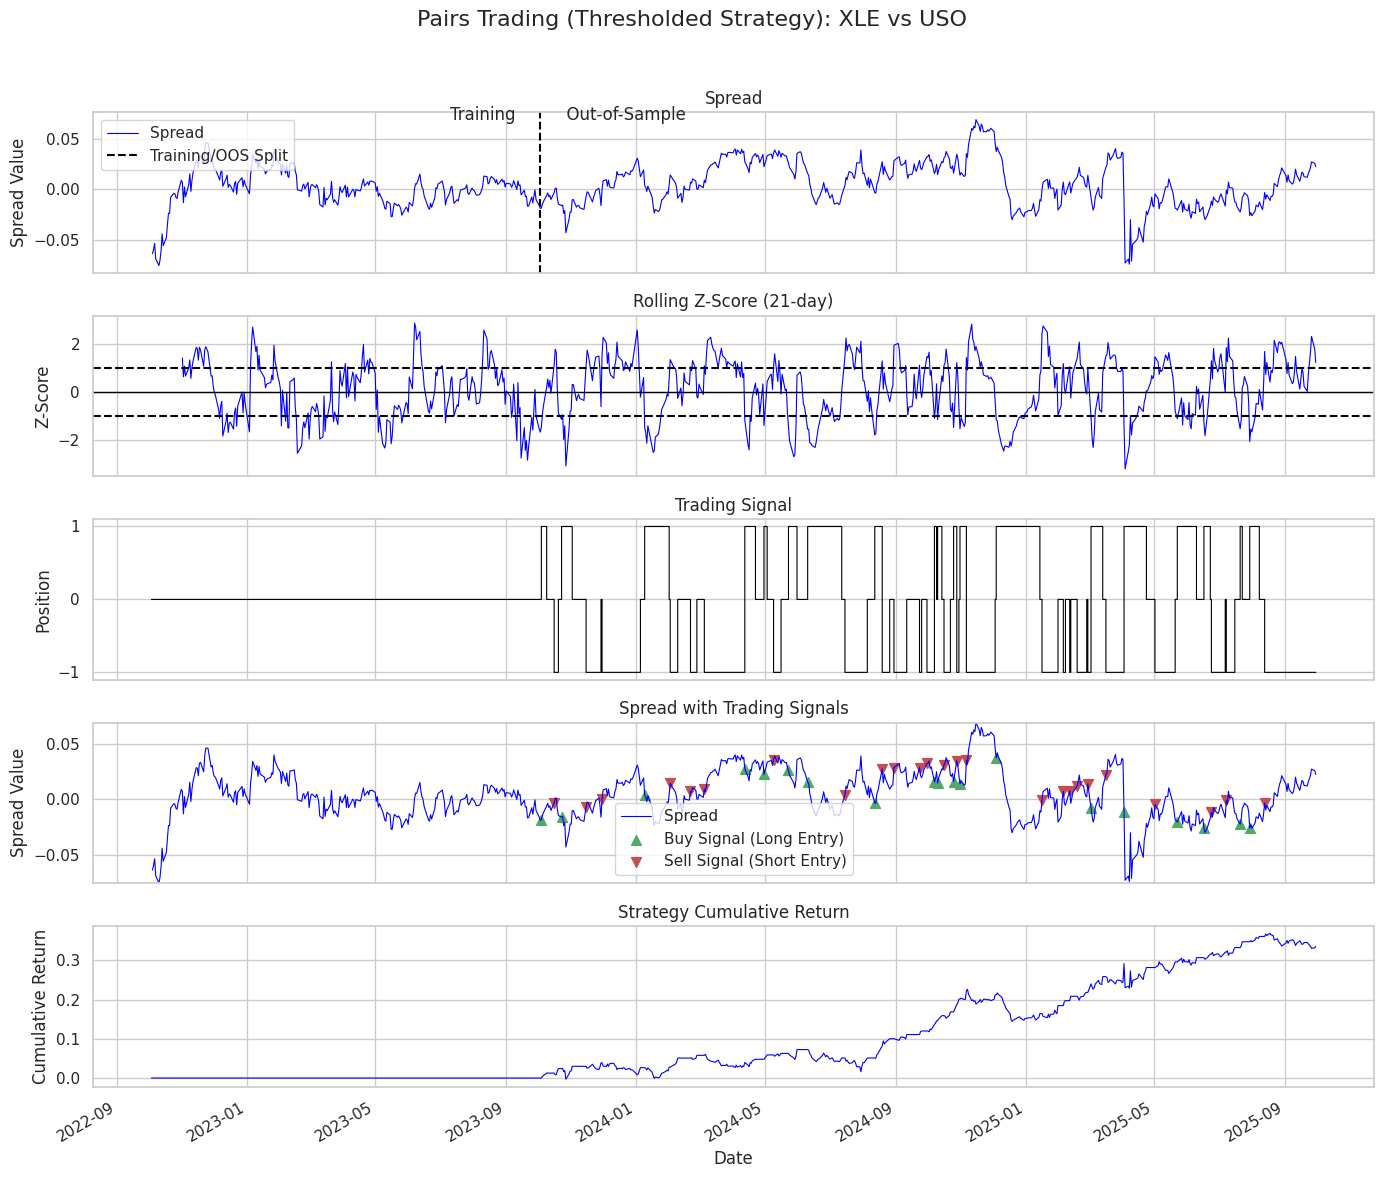

Final Cumulative Return: 0.3352


In [11]:
y1 = np.log(df_pair[pair_names[1]])
y2 = np.log(df_pair[pair_names[0]])

T = len(y1)

# rolling windows parameters (can be adjusted here)
T_trn = 1 * 252
zscore_lookback = 1 * 21
entry_zscore = 1
exit_zscore = 0.0


# Rolling Hedge Ratio (Rolling LS)

rolling_ls_results = fit_rolling_ls(y1, y2, lookback=T_trn, every=1)
beta = rolling_ls_results['beta']
mean = rolling_ls_results['mean']

# Compute Spread

beta_lagged = beta.shift(1)
mean_lagged = mean.shift(1)

w1 = 1 / (1 + beta_lagged)
w2 = -beta_lagged / (1 + beta_lagged)

spread = (w1 * y1) + (w2 * y2) - (mean_lagged / (1 + beta_lagged))

# Generate Sizing Signal (Thresholded Strategy)
start_signal_at = T_trn + 1

results_BB = generate_BB_thresholded_signal(
    spread,
    entry_zscore=entry_zscore,
    exit_zscore=exit_zscore,
    lookback=zscore_lookback,
    start_signal_at=start_signal_at
)
z_score = results_BB['z_score']
signal = results_BB['signal']

# Compute P&L
portf_cumret = compute_cumPnL_spread_trading(spread, signal, compounded=False)

long_entries = spread[(signal.shift(1) <= 0) & (signal > 0)]
short_entries = spread[(signal.shift(1) >= 0) & (signal < 0)]

# Plot the Results
fig, axs = plt.subplots(5, 1, figsize=(14, 12), sharex=True)
fig.suptitle(f'Pairs Trading (Thresholded Strategy): {pair_names[1]} vs {pair_names[0]}', fontsize=16)
fig.autofmt_xdate()

training_line_date = spread.index[T_trn - 1]

# Plot 1: Spread
axs[0].plot(spread.index, spread.values, label='Spread', color='blue', linewidth=0.8)
axs[0].axvline(x=training_line_date, color='black', linestyle='--', label='Training/OOS Split')
axs[0].set_ylabel('Spread Value')
axs[0].set_title('Spread')
axs[0].legend(loc='upper left')
axs[0].grid(True)
y_max_spread = spread.dropna().max()
axs[0].text(spread.index[T_trn - 10], y_max_spread, 'Training  ', horizontalalignment='right')
axs[0].text(spread.index[T_trn + 10], y_max_spread, '  Out-of-Sample', horizontalalignment='left')

# Plot 2: Z-Score
axs[1].plot(z_score.index, z_score.values, label='Z-Score', color='blue', linewidth=0.8)
axs[1].axhline(0, color='black', linewidth=1)
axs[1].axhline(entry_zscore, color='black', linestyle='--')
axs[1].axhline(-entry_zscore, color='black', linestyle='--')
axs[1].set_ylabel('Z-Score')
axs[1].set_title(f'Rolling Z-Score ({zscore_lookback}-day)')
axs[1].grid(True)

# Plot 3: Positions (Signal)
axs[2].plot(signal.index, signal.values, drawstyle='steps-post', label='Position', color='black', linewidth=0.8)
axs[2].set_ylabel('Position')
axs[2].set_title('Trading Signal')
axs[2].set_yticks([-1, 0, 1])
axs[2].grid(True)

# Plot 4: Spread with Trading Signals
axs[3].plot(spread.index, spread.values, label='Spread', color='blue', linewidth=0.8)
axs[3].scatter(long_entries.index, long_entries.values, color='g', marker='^', label='Buy Signal (Long Entry)', s=50)
axs[3].scatter(short_entries.index, short_entries.values, color='r', marker='v', label='Sell Signal (Short Entry)', s=50)
axs[3].set_ylabel('Spread Value')
axs[3].set_title('Spread with Trading Signals')
axs[3].set_ylim(spread.min(), spread.max())
axs[3].legend()
axs[3].grid(True)

# Plot 5: Cumulative Return
axs[4].plot(portf_cumret.index, portf_cumret.values, label='Cumulative Returns', color='blue', linewidth=0.8)
axs[4].set_ylabel('Cumulative Return')
axs[4].set_title('Strategy Cumulative Return')
axs[4].set_xlabel('Date')
axs[4].grid(True)

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print(f"Final Cumulative Return: {portf_cumret.iloc[-1]:.4f}")

/tmp/ipython-input-3474786856.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  beta = beta.fillna(method='ffill')
/tmp/ipython-input-3474786856.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mean = mean.fillna(method='ffill')
/tmp/ipython-input-3474786856.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  beta = beta.fillna(method='bfill')
/tmp/ipython-input-3474786856.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mean = mean.fillna(method='bfill')


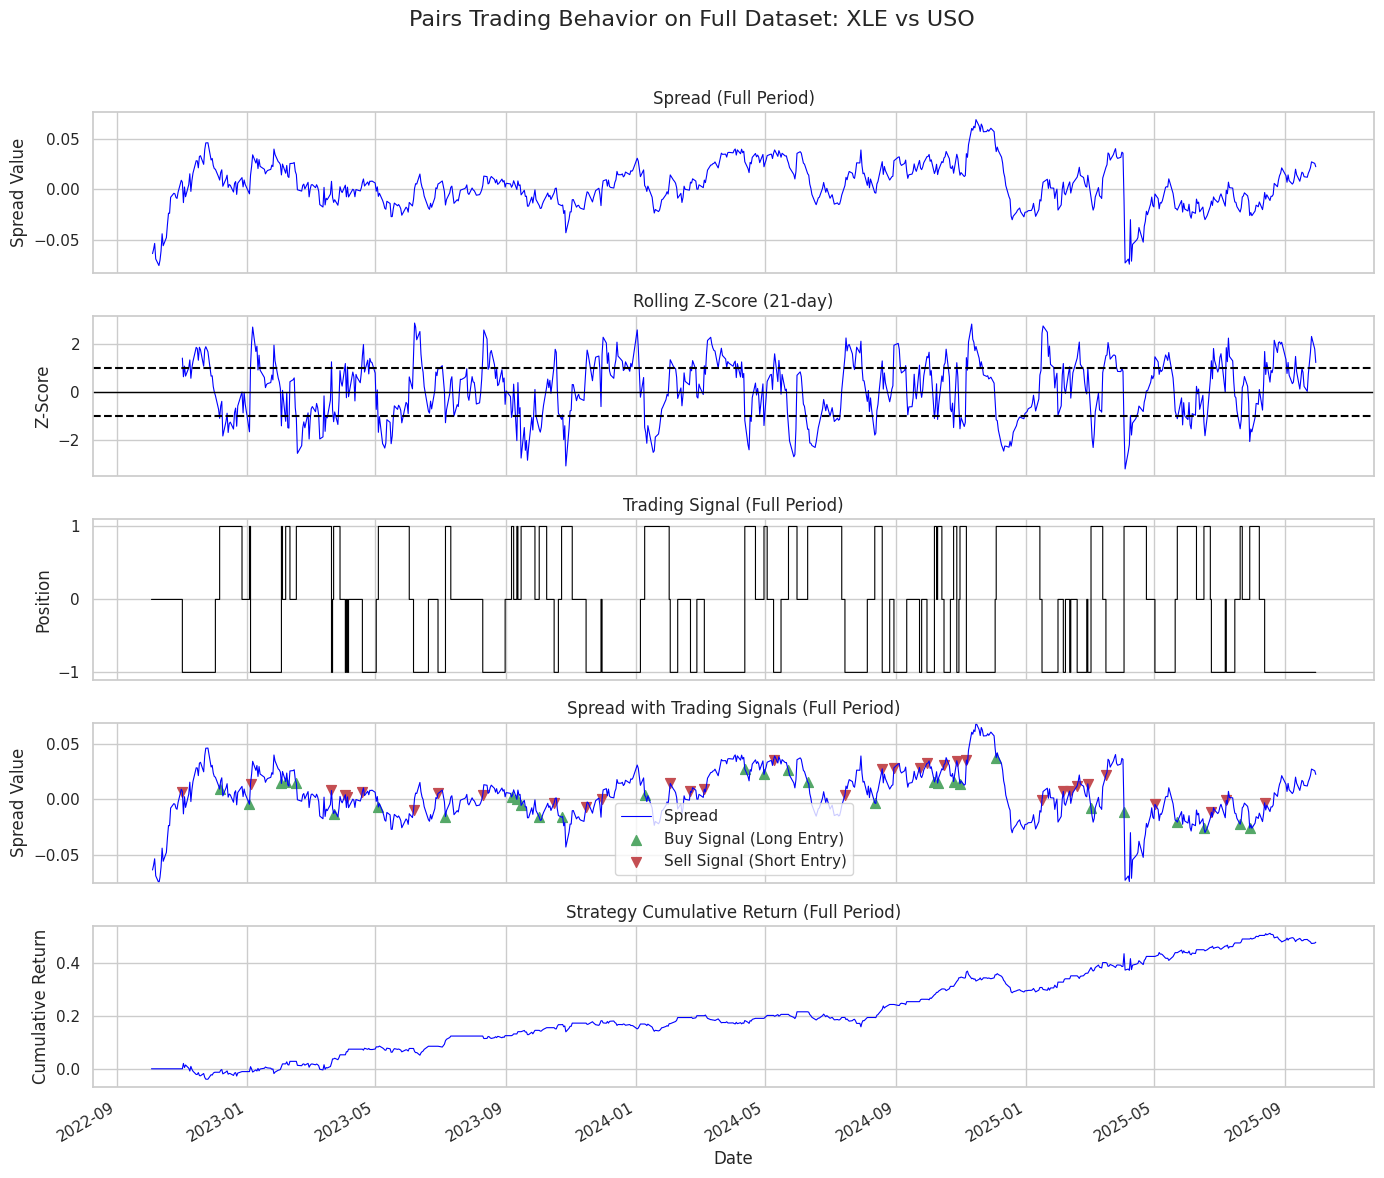

Final Cumulative Return (Full Period): 0.4778


In [12]:
rolling_ls_results_full = fit_rolling_ls(y1, y2, lookback=T_trn, every=1)
beta_full = rolling_ls_results_full['beta']
mu_full = rolling_ls_results_full['mean']

beta_lagged_full = beta_full.shift(1)
mu_lagged_full = mu_full.shift(1)
w1_full = 1 / (1 + beta_lagged_full)
w2_full = -beta_lagged_full / (1 + beta_lagged_full)
spread_full = (w1_full * y1) + (w2_full * y2) - (mu_lagged_full / (1 + beta_lagged_full))


start_signal_full = zscore_lookback + 1

results_BB_full = generate_BB_thresholded_signal(
    spread_full,
    entry_zscore=entry_zscore,
    exit_zscore=exit_zscore,
    lookback=zscore_lookback,
    start_signal_at=start_signal_full
)
z_score_full = results_BB_full['z_score']
signal_full = results_BB_full['signal']


portf_cumret_full = compute_cumPnL_spread_trading(spread_full, signal_full, compounded=False)

long_entries = spread_full[(signal_full.shift(1) <= 0) & (signal_full > 0)]
short_entries = spread_full[(signal_full.shift(1) >= 0) & (signal_full < 0)]

fig_full, axs_full = plt.subplots(5, 1, figsize=(14, 12), sharex=True)
fig_full.suptitle(f'Pairs Trading Behavior on Full Dataset: {pair_names[1]} vs {pair_names[0]}', fontsize=16)
fig_full.autofmt_xdate()

# Plot 1: Spread
axs_full[0].plot(spread_full.index, spread_full.values, label='Spread', color='blue', linewidth=0.8)
axs_full[0].set_ylabel('Spread Value')
axs_full[0].set_title('Spread (Full Period)')
axs_full[0].grid(True)

# Plot 2: Z-Score
axs_full[1].plot(z_score_full.index, z_score_full.values, label='Z-Score', color='blue', linewidth=0.8)
axs_full[1].axhline(0, color='black', linewidth=1)
axs_full[1].axhline(entry_zscore, color='black', linestyle='--')
axs_full[1].axhline(-entry_zscore, color='black', linestyle='--')
axs_full[1].set_ylabel('Z-Score')
axs_full[1].set_title(f'Rolling Z-Score ({zscore_lookback}-day)')
axs_full[1].grid(True)

# Plot 3: Positions (Signal)
axs_full[2].plot(signal_full.index, signal_full.values, drawstyle='steps-post', label='Position', color='black', linewidth=0.8)
axs_full[2].set_ylabel('Position')
axs_full[2].set_title('Trading Signal (Full Period)')
axs_full[2].set_yticks([-1, 0, 1])
axs_full[2].grid(True)

# Plot 4: Spread with Trading Signals
axs_full[3].plot(spread_full.index, spread_full.values, label='Spread', color='blue', linewidth=0.8)
axs_full[3].scatter(long_entries.index, long_entries.values, color='g', marker='^', label='Buy Signal (Long Entry)', s=50)
axs_full[3].scatter(short_entries.index, short_entries.values, color='r', marker='v', label='Sell Signal (Short Entry)', s=50)
axs_full[3].set_ylabel('Spread Value')
axs_full[3].set_title('Spread with Trading Signals (Full Period)')
axs_full[3].set_ylim(spread_full.min(), spread_full.max())
axs_full[3].legend()
axs_full[3].grid(True)

# Plot 5: Cumulative Return
axs_full[4].plot(portf_cumret_full.index, portf_cumret_full.values, label='Cumulative Returns', color='blue', linewidth=0.8)
axs_full[4].set_ylabel('Cumulative Return')
axs_full[4].set_title('Strategy Cumulative Return (Full Period)')
axs_full[4].set_xlabel('Date')
axs_full[4].grid(True)


fig_full.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print(f"Final Cumulative Return (Full Period): {portf_cumret_full.iloc[-1]:.4f}")

# **Result Evaluation**

This section evaluates the performance of the pairs trading strategy using key metrics. We analyze the Sharpe Ratio for risk-adjusted return, the Maximum Drawdown to understand potential losses, the Profit Factor to assess profitability per unit of loss, and the Total Number of Trades to gauge trading frequency, providing insights into the strategy's effectiveness across different periods.

In [13]:
#Sharpe ratio calculation
daily_returns = portf_cumret.diff().dropna()
daily_returns_full = portf_cumret_full.diff().dropna()

sharpe_ratio_training = daily_returns.mean() / daily_returns.std() * np.sqrt(252)

sharpe_ratio_full = daily_returns_full.mean() / daily_returns_full.std() * np.sqrt(252)

print(f"Sharpe Ratio (Training Period): {sharpe_ratio_training:.2f}")
print(f"Sharpe Ratio (Full Period): {sharpe_ratio_full:.2f}")

Sharpe Ratio (Training Period): 1.1897
Sharpe Ratio (Full Period): 1.4421


In [17]:
# Calculate maximum drawdown for the training period
cumulative_returns_training = portf_cumret
running_max_training = cumulative_returns_training.cummax()
drawdown_training = running_max_training - cumulative_returns_training
max_drawdown_training = drawdown_training.max()

# Calculate maximum drawdown for the full period
cumulative_returns_full = portf_cumret_full
running_max_full = cumulative_returns_full.cummax()
drawdown_full = running_max_full - cumulative_returns_full
max_drawdown_full = drawdown_full.max()

print(f"Maximum Drawdown (Training Period): {max_drawdown_training*100:.2f}%")
print(f"Maximum Drawdown (Full Period): {max_drawdown_full*100:.2f}%")

Maximum Drawdown (Training Period): 8.18%
Maximum Drawdown (Full Period): 8.18%


In [21]:
# Calculate daily returns
daily_returns = portf_cumret.diff().dropna()
daily_returns_full = portf_cumret_full.diff().dropna()

# Calculate gross profits and gross losses for the training period
gross_profits_training = daily_returns[daily_returns > 0].sum()
gross_losses_training = abs(daily_returns[daily_returns < 0].sum())

# Calculate gross profits and gross losses for the full period
gross_profits_full = daily_returns_full[daily_returns_full > 0].sum()
gross_losses_full = abs(daily_returns_full[daily_returns_full < 0].sum())

# Calculate profit factor for the training period
profit_factor_training = gross_profits_training / gross_losses_training if gross_losses_training != 0 else float('inf')

# Calculate profit factor for the full period
profit_factor_full = gross_profits_full / gross_losses_full if gross_losses_full != 0 else float('inf')

print(f"Profit Factor (Training Period): {profit_factor_training:.4f}")
print(f"Profit Factor (Full Period): {profit_factor_full:.4f}")

Profit Factor (Training Period): 1.3596
Profit Factor (Full Period): 1.3454


In [22]:
# Calculate total number of trades for the training period
# A trade starts when the signal changes from 0 to 1 (long entry) or from 0 to -1 (short entry)
trades_training = ((signal.shift(1) == 0) & (signal != 0)).sum()

# Calculate total number of trades for the full period
trades_full = ((signal_full.shift(1) == 0) & (signal_full != 0)).sum()

print(f"Total Number of Trades (Training Period): {trades_training}")
print(f"Total Number of Trades (Full Period): {trades_full}")

Total Number of Trades (Training Period): 37
Total Number of Trades (Full Period): 53
